# Úkol

Vytvořte konvoluční neuronovou síť, která bude zpracovávat MNIST dataset.

Porovnejte ji s neuronovou sítí s plně propojeným vrstvami.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Načtení a zobrazení dat

In [3]:
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
# Hodnoty jsou odstíny šedi 0 - 255
# 0 je cerna, 255 je bila
img = X_train[0]
print (f"min:{np.amin(X_train[0])} max:{np.amax(X_train[0])}")

min:0 max:255


In [5]:
# funkce pro zobrazení n prvních čísel včetně jejich popisků
def show_images (images, labels, rows=6, cols=10):
    fig, axes = plt.subplots(rows, cols, figsize=(cols, rows))
    for idx in range (0, rows * cols):
        ridx=idx // cols
        cidx=idx % cols
        ax= axes[ridx, cidx]
        ax.axis("off")
        ax.imshow(images[idx], cmap="gray_r")
        ax.set_title(f"{labels[idx]}")
    plt.show()    

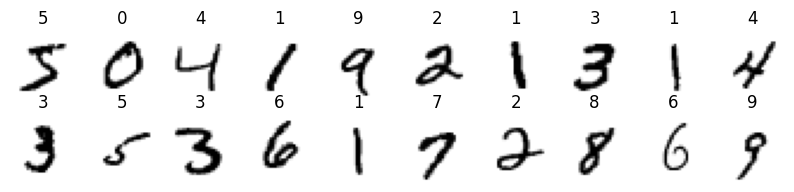

In [6]:
show_images(X_train, Y_train, 2, 10)

# 2. Příprava dat

Standardizace hodnot z rozsahu 0 - 255 na rozsah 0 - 1

In [7]:
# Vstupem do neuronové sítě je vektor. 
# Změníme tvar pole jedné číslice z 28x28 na 784x1
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

In [8]:
# pro neuronovou síť potřebujeme upravit i výsledky pomocí binárního encodování
# tentokát použijeme vestavěnou funkci ve frameworku keras
from keras.utils import to_categorical 
Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)

# 3. Neuronová síť

In [9]:
import keras
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential

In [ ]:
# Vytvoření modelu
model_cnn = Sequential()

# První konvoluční vrstva s max pooling
model_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))

# Druhá konvoluční vrstva s max pooling
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))

# Převod na 1D vektor
model_cnn.add(Flatten())

# Plně propojená vrstva
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.5))

# Výstupní vrstva
model_cnn.add(Dense(10, activation='softmax'))

# Kompilace modelu
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Trénování modelu
history_cnn = model_cnn.fit(X_train, Y_train, epochs=10, batch_size=128, validation_data=(X_test, Y_test))


c:\Users\Jituska\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.8082 - loss: 0.6035 - val_accuracy: 0.9798 - val_loss: 0.0615
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9678 - loss: 0.1081 - val_accuracy: 0.9859 - val_loss: 0.0426
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9769 - loss: 0.0784 - val_accuracy: 0.9865 - val_loss: 0.0388
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9821 - loss: 0.0602 - val_accuracy: 0.9895 - val_loss: 0.0311
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9859 - loss: 0.0485 - val_accuracy: 0.9903 - val_loss: 0.0323
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9865 - loss: 0.0446 - val_accuracy: 0.9922 - val_loss: 0.0256
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9884 - loss: 0.0390 - val_accuracy: 0.9910 - val_loss: 0.0279
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9888 - loss: 0.0361 - 

In [15]:
model_cnn.save('classification_model_mnist.h5')


# 4. Historie učení modelu
- Zobrazte učební křivku
- Zobrazte křivku přesnosti modelu
- Popište tvary

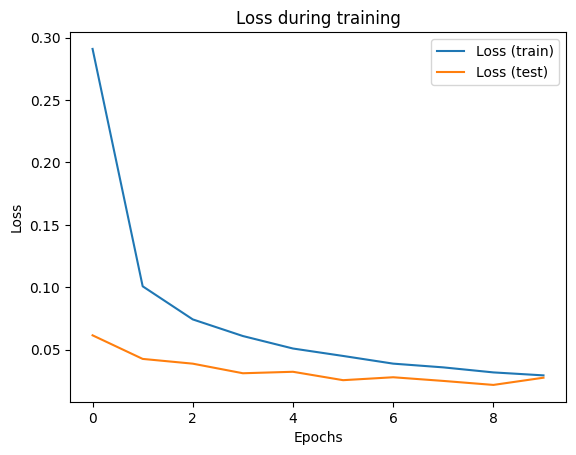

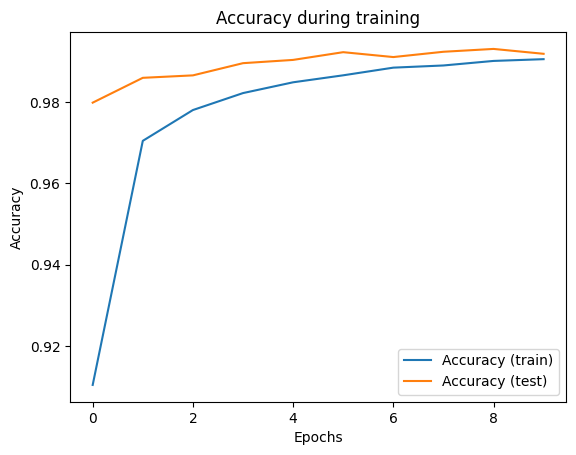

In [16]:
# Zobrazení historie učení a přesnosti
plt.plot(history_cnn.history['loss'], label='Loss (train)')
plt.plot(history_cnn.history['val_loss'], label='Loss (test)')
plt.title('Loss during training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history_cnn.history['accuracy'], label='Accuracy (train)')
plt.plot(history_cnn.history['val_accuracy'], label='Accuracy (test)')
plt.title('Accuracy during training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# 5. Ověření modelu
- R2 skóre
- Přesnost modelu jako celku
- Přesnost přes třídy
- Matice změn
- Příklady špatné klasifikace

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Accuracy: 0.9918


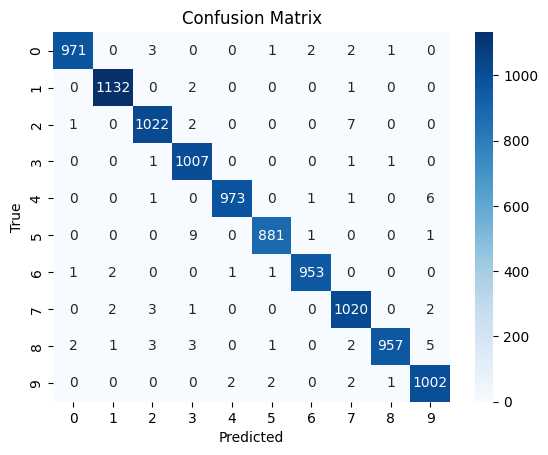

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Predikce na testovacích datech
Y_pred = model_cnn.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true_classes = np.argmax(Y_test, axis=1)

# Přesnost modelu
accuracy = accuracy_score(Y_true_classes, Y_pred_classes)
print(f'Accuracy: {accuracy}')

# Matice záměn
cm = confusion_matrix(Y_true_classes, Y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# 6. Porovnání modelu
- Který model je přesnější
- Jak je to s délkou učení
- Jak je to s délkou inference

In [14]:
# Model s plně propojenými vrstvami (Fully Connected Model)
model_fc = Sequential()

# Ploché vrstvy (Flattening)
model_fc.add(Flatten(input_shape=(28, 28, 1)))

# Plně propojené vrstvy
model_fc.add(Dense(128, activation='relu'))
model_fc.add(Dropout(0.5))

# Výstupní vrstva
model_fc.add(Dense(10, activation='softmax'))

# Kompilace modelu
model_fc.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Trénování modelu
history_fc = model_fc.fit(X_train, Y_train, epochs=10, batch_size=128, validation_data=(X_test, Y_test))


Epoch 1/10


c:\Users\Jituska\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7479 - loss: 0.8270 - val_accuracy: 0.9368 - val_loss: 0.2142
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9211 - loss: 0.2744 - val_accuracy: 0.9538 - val_loss: 0.1564
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9364 - loss: 0.2165 - val_accuracy: 0.9614 - val_loss: 0.1301
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9446 - loss: 0.1913 - val_accuracy: 0.9648 - val_loss: 0.1194
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9502 - loss: 0.1682 - val_accuracy: 0.9693 - val_loss: 0.1046
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9561 - loss: 0.1517 - val_accuracy: 0.9711 - val_loss: 0.0993
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9587 - loss: 0.1372 - val_accuracy: 0.9722 - val_loss: 0.0932
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9598 - loss: 0.1321 - val_accuracy: 0.9742 - val_